<a href="https://colab.research.google.com/github/Manash-Christ/2348528-lab1/blob/main/Copy_of_2348528_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [6]:
#setting index as CustomerID
if df.CustomerId.nunique() == len(df):
  df.set_index('CustomerId',inplace=True)

#dropping irrelevant features
df.drop(['Surname','RowNumber'],axis=1,inplace=True)

#separating CLASSES
cat1 = [x for x in df.columns if str(df[x].dtype) == 'object']
ints = [x for x in df.columns if str(df[x].dtype) == 'int64'and df[x].nunique() > 5]
floats = [x for x in df.columns if str(df[x].dtype) == 'float64']
cat2 = [x for x in df.columns if df[x].nunique() <=5  and str(df[x].dtype) != 'object']
cols = [cat1,ints,floats,cat2]
cols

[['Geography', 'Gender'],
 ['CreditScore', 'Age', 'Tenure'],
 ['Balance', 'EstimatedSalary'],
 ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

In [7]:
for i in cols:
  print(df[i].describe().T)

           count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457
               count      mean        std    min    25%    50%    75%    max
CreditScore  10000.0  650.5288  96.653299  350.0  584.0  652.0  718.0  850.0
Age          10000.0   38.9218  10.487806   18.0   32.0   37.0   44.0   92.0
Tenure       10000.0    5.0128   2.892174    0.0    3.0    5.0    7.0   10.0
                   count           mean           std    min       25%  \
Balance          10000.0   76485.889288  62397.405202   0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818  11.58  51002.11   

                        50%          75%        max  
Balance           97198.540  127644.2400  250898.09  
EstimatedSalary  100193.915  149388.2475  199992.48  
                  count    mean       std  min  25%  50%  75%  max
NumOfProducts   10000.0  1.5302  0.581654  1.0  1.0  1.0  2.0  4.0
HasCrCard       10000.0  0.7055  0.455840  0.0  0.0  1.0  1

## Rithim's work
data cleaning, removing noisy data, handling outliers and binning.


In [8]:
df.isnull().sum()
#NO MISSING VALUES

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

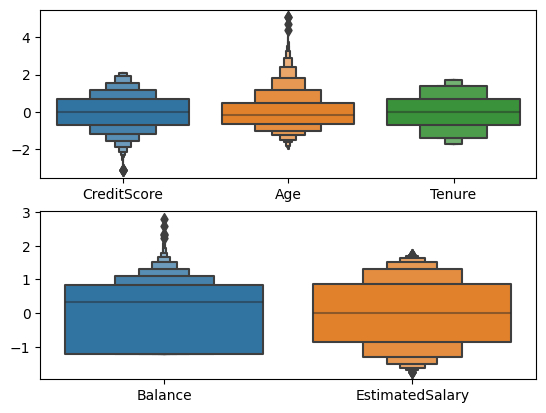

In [9]:
#PLOTTING THE DATA TO SEARCH FOR OUTLIERS
f, (ax1,ax2) = plt.subplots(2,1)
sns.boxenplot((df[cols[1]]-df[cols[1]].mean())/df[cols[1]].std(),ax=ax1);sns.boxenplot((df[cols[2]]-df[cols[2]].mean())/df[cols[2]].std(),ax=ax2);plt.show()

We find that Age, credit score and balance has the most number of outliers. We will remove the outliers after eliminating 3 standard deviations from the mean.

Chosing to remove outliers from 3 standard deviations from the mean will result in the following values.



In [13]:
out = df[cols[1]+cols[2]]
#out = (out - out.mean())/out.std()
for i in out.columns:
  print(f"Upper limit for {i}",out[i].mean() + 2.5*out[i].std())
  print(f"Lower limit for {i}",out[i].mean() - 2.5*out[i].std())

Upper limit for CreditScore 892.162046840326
Lower limit for CreditScore 408.89555315967414
Upper limit for Age 65.14131612926153
Lower limit for Age 12.702283870738476
Upper limit for Tenure 12.24323594262421
Lower limit for Tenure -2.2176359426242094
Upper limit for Balance 232479.4022939649
Lower limit for Balance -79507.62371796489
Upper limit for EstimatedSalary 243866.47192524542
Lower limit for EstimatedSalary -43685.992163245406


In [14]:
cred_out = df[(df.CreditScore < 408) | (df.CreditScore > 892)]
cred_out

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15804586,376,France,Female,46,6,0.00,1,1,0,157333.69,1
15779947,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
15651052,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
15612494,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
15685372,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
15758813,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
15692416,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
15718893,404,Germany,Female,54,4,125456.07,1,1,0,83715.66,1


In [15]:
age_out = df[(df.Age < 12) | (df.Age > 65)]
age_out

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15623944,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
15805254,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
15589975,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
15808473,673,France,Male,72,1,0.00,2,0,1,111981.19,0
15704769,585,France,Female,67,5,113978.97,2,0,1,93146.11,0
...,...,...,...,...,...,...,...,...,...,...,...
15644103,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0
15775761,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1
15705174,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0


In [16]:
df[(df.Balance < -79507.62371796489) | (df.Balance > 232479.4022939649)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1


In [17]:
df = df.drop(index = age_out.index)
df = df.drop(index = cred_out.index)

In [18]:
len(df)

9712

In [45]:
#Binning Age and credit score into nearest 5s and 25s respectively.
df['credit_score_tf'] = df['CreditScore'].apply(lambda x: 25*round(x/25))
df['age_tf'] = df['Age'].apply(lambda x: 5*round(x/5))

# log10-transform balance and estimated salary into bins of 5s and 2s.
df['log10_balance'] = df['Balance'].apply(lambda x: 1/5*round(5*np.log10(x+1)))
df['log10_estimated_salary'] = df['EstimatedSalary'].apply(lambda x: 1/2*round(2*np.log10(x)))

df.drop(["EstimatedSalary","Age","CreditScore","Balance"],axis=1,inplace=True)
df

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,credit_score_tf,age_tf,log10_balance,log10_estimated_salary
CustomerId,,,,,,,,,,,
15634602,France,Female,2,1,1,1,1,625,40,0.0,5.0
15647311,Spain,Female,1,1,0,1,0,600,40,5.0,5.0
15619304,France,Female,8,3,1,0,1,500,40,5.2,5.0
15701354,France,Female,1,2,0,0,0,700,40,0.0,5.0
15737888,Spain,Female,2,1,1,1,0,850,45,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,France,Male,5,2,1,0,0,775,40,0.0,5.0
15569892,France,Male,10,1,1,1,0,525,35,4.8,5.0
15584532,France,Female,7,1,0,1,1,700,35,0.0,4.5


<Axes: xlabel='CreditScore', ylabel='Count'>

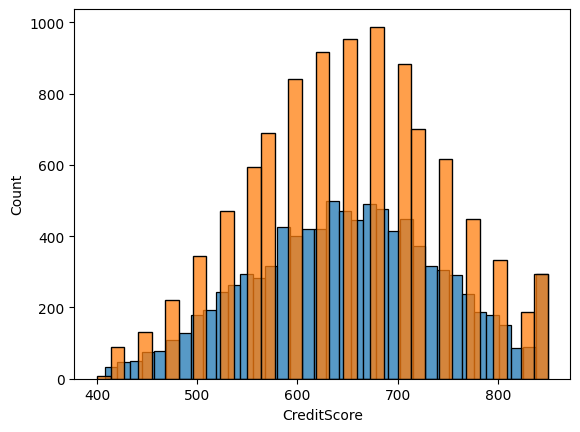

In [23]:
sns.histplot(df.CreditScore)
sns.histplot(df.credit_score_tf)

<Axes: xlabel='Age', ylabel='Count'>

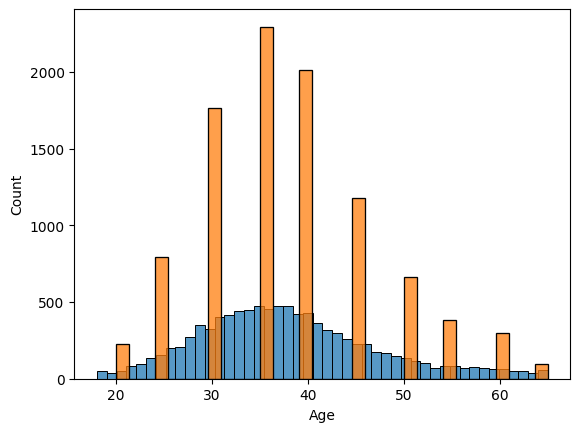

In [32]:
sns.histplot(df.Age)
sns.histplot(df.age_tf)

<Axes: xlabel='log10_estimated_salary', ylabel='Count'>

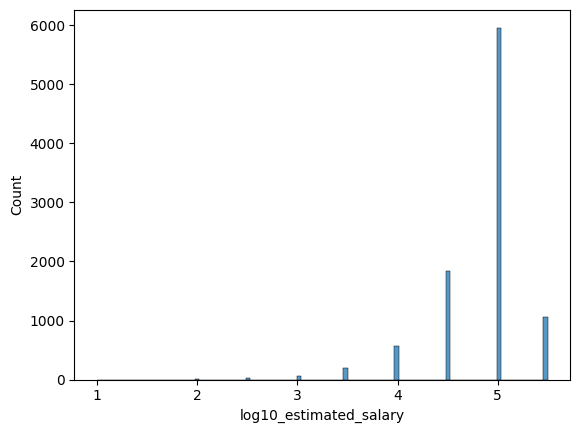

In [29]:
#sns.histplot(df.Balance)
sns.histplot(df.log10_credit_score)

## Tamirra's work
Data integration, finding relationship between features, additional dataset integration and EDA.


In [46]:
#DUMMY VARIABLE ENCODING and SCALING
st = StandardScaler()
dff = pd.get_dummies(df,columns=cols[0])


In [47]:
dff[['credit_score_tf','age_tf', 'log10_balance', 'log10_estimated_salary']] = st.fit_transform(dff[['credit_score_tf','age_tf', 'log10_balance', 'log10_estimated_salary']])

In [48]:
c1 = [x for x in dff.columns if str(dff[x].dtype) == 'int64']
c2 = [x for x in dff.columns if str(dff[x].dtype) == 'float64']
c1,c2

(['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
 ['credit_score_tf', 'age_tf', 'log10_balance', 'log10_estimated_salary'])

<Axes: >

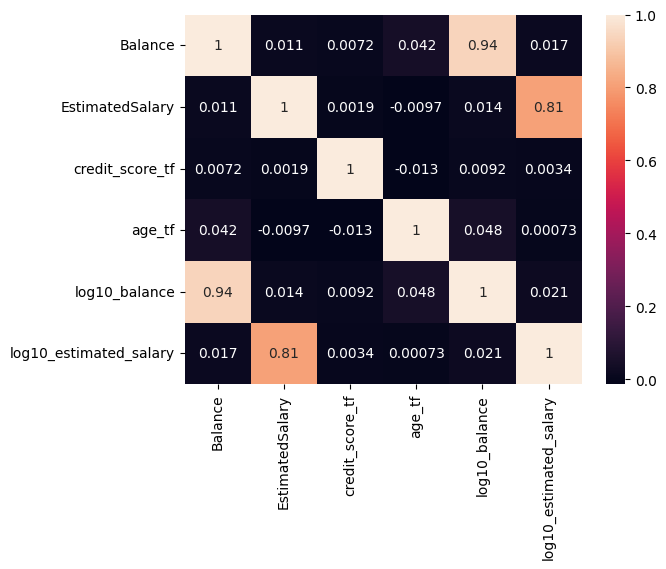

In [37]:
sns.heatmap(dff[c2].corr(),annot=True)

<Axes: >

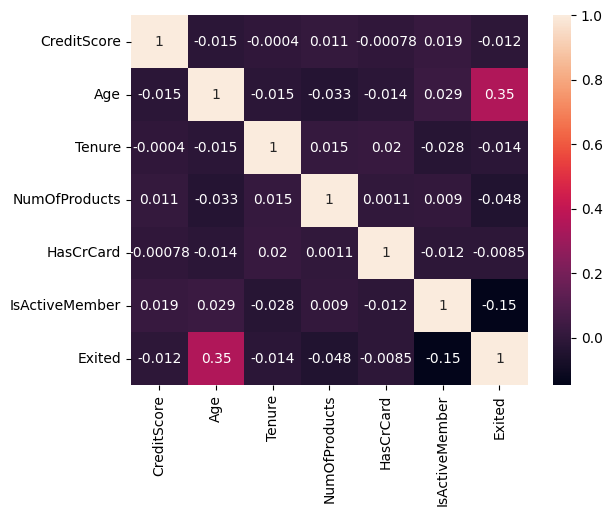

In [38]:
sns.heatmap(dff[c1].corr(),annot=True)

<Axes: >

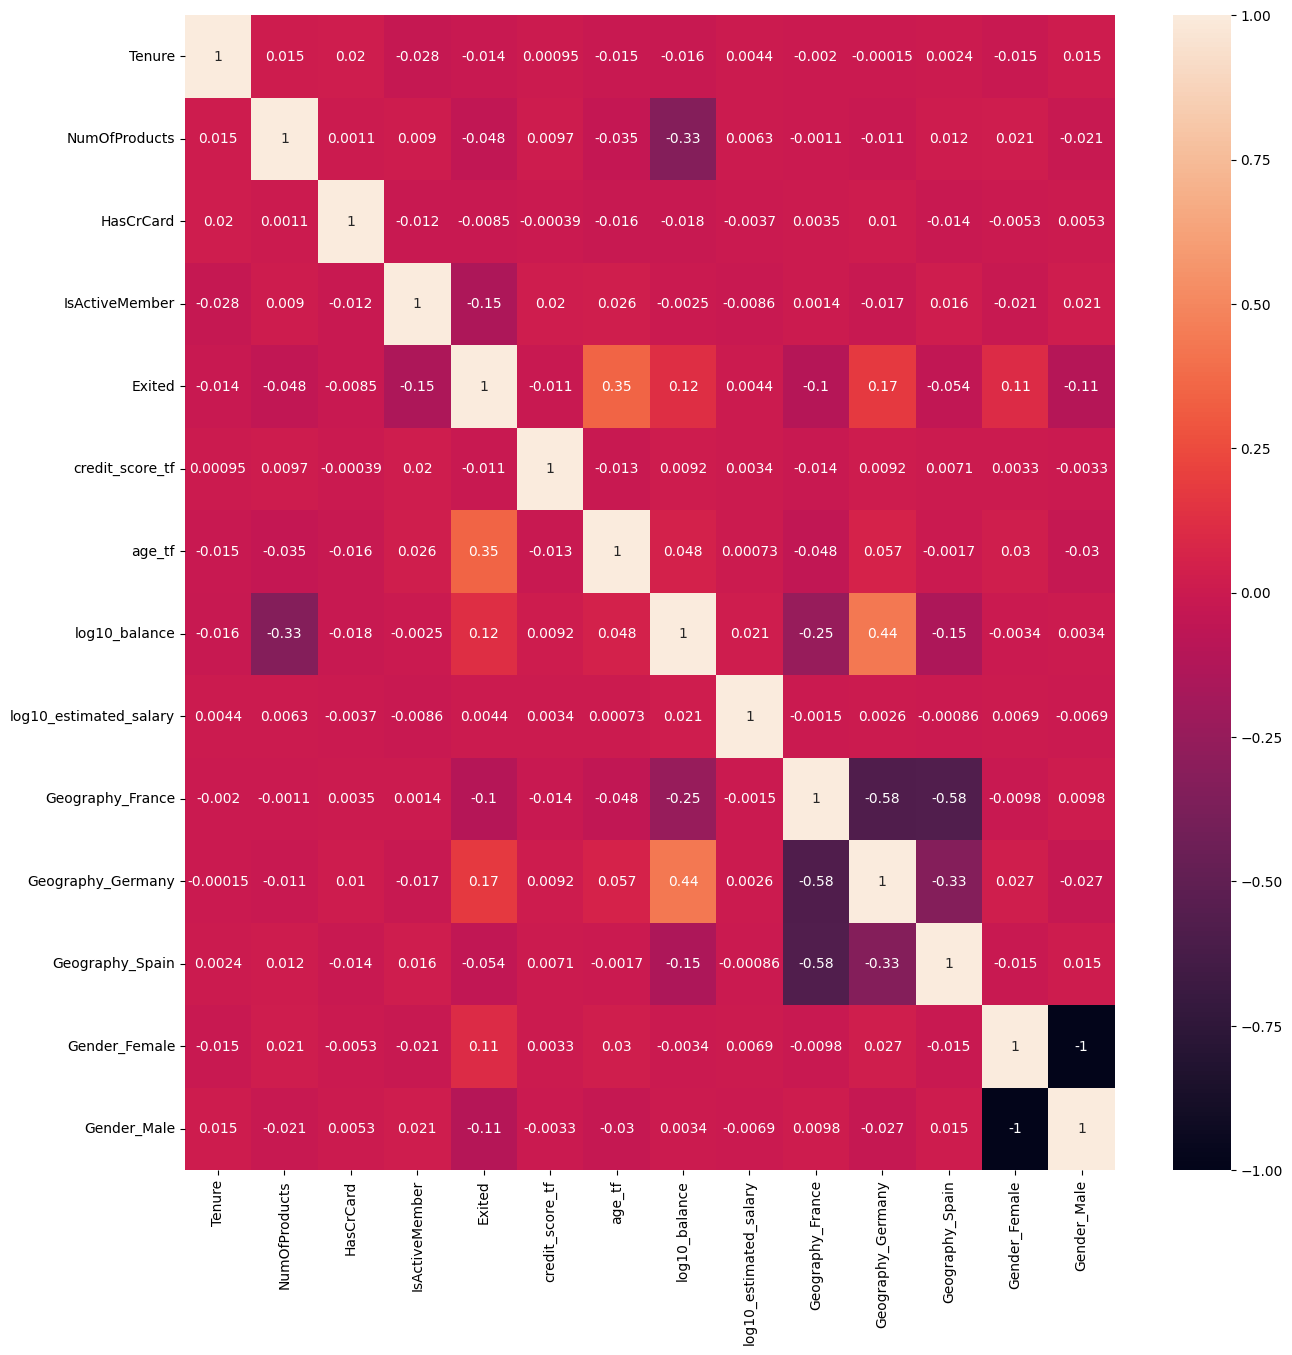

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dff.corr(),annot=True,ax=ax)

KeyError: ignored

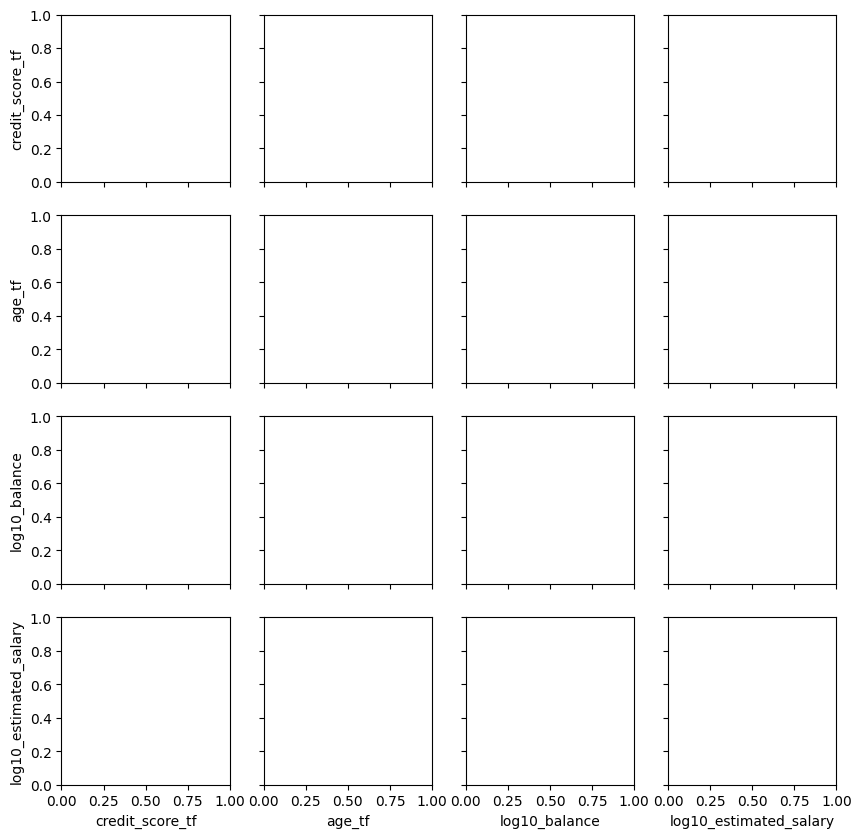

In [50]:
sns.pairplot(df[c2], hue = 'Exited')

## Tanila's work
Data Scaling, Data Dimensionality Reduction, and Feature Selection.
Use scaling
techniques, such as min-max
normalization or standardization, to
ensure numerical features are on a
similar scale.

In [41]:
#CHI SQUARE FOR CATEGORICAL VARIABLES

In [42]:
from sklearn.feature_selection import chi2

X = dff[c1].drop('Exited',axis=1)
y = df.Exited

chi_vals = chi2(X, y)
chi = pd.Series(chi_vals[0],index=c1.remove('Exited'))
p = pd.Series(chi_vals[1],index=c1)

<BarContainer object of 6 artists>

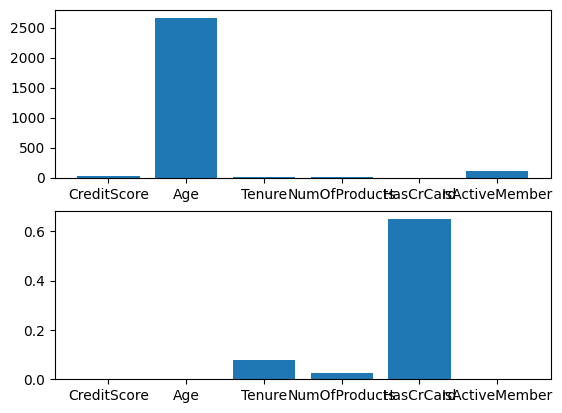

In [43]:
f, ax = plt.subplots(2,1)
ax[0].bar(x=c1,height=chi)
ax[1].bar(x=c1,height=p)

#T test for feature selection

IN TWO SAMPLE T TEST, WE CAN COMPARE BETWEEN THE MEAN OF TWO SAMPLES OF THE SAME POPULATION, AND SEE THE RELATIONSHIP BETWEEN THEM AND IF ONE MEAN IS SIGNIFICANTLY DIFFERENT FROM ANOTHER.


In [44]:
T = ( (x1  - x2) )/ np.sqrt( (x1.var()/N1) + (x2.var()/N2))
#FOR EACH VARIABLE, UNDER CONSIDERATION, WE SHOULD SEE HOW DIFFERENT IS THE MEAN IF EXITED AND THE MEAN IF NOT EXITED. iF THE DIFFERENCE IS SGNIFICANT, WE SHOULD CONSIDER THAT VARIABLE.

NameError: ignored

So we see that if an existing customer has a credit card, he is more likely to exit the bank.

**PCA**

In [51]:
comp = [3,6,9]
exp_var = {}
for i in comp:
  pca = PCA(n_components=i)
  pca.fit_transform(dff)
  exp_var[i] = pca.explained_variance_ratio_

In [52]:
exp_var

{3: array([0.5789529 , 0.08002703, 0.07034384]),
 6: array([0.5789529 , 0.08002703, 0.07034384, 0.06901262, 0.06769666,
        0.03449082]),
 9: array([0.5789529 , 0.08002703, 0.07034384, 0.06901262, 0.06769666,
        0.03449082, 0.02526342, 0.02056084, 0.01786139])}

The First principle component is able to explain about 57% of the total variance in the dataset.

## Additional work
Balance the classes to remove class bias. Use advanced resampling techniques and synthetic data generation like SMOTE and ADASYN.
Steps:
1. find the k nearest neighbours for the minority points and find the ri value. ri signifies the influence of majority class near the neighbourhood.
2. normalise ri so that the sum is equal to 1.
3. Generate Gi, which tells about the number of synthetic examples to be generated.
4. si = xi + (xzi - xi)*Th. si is the new synthetic data point.
5. white noise can be added to the new synthetic sample to make it more realistic.

In [ ]:
dff.Exited.value_counts()

##Aditional plotting

In [53]:
import seaborn as sns

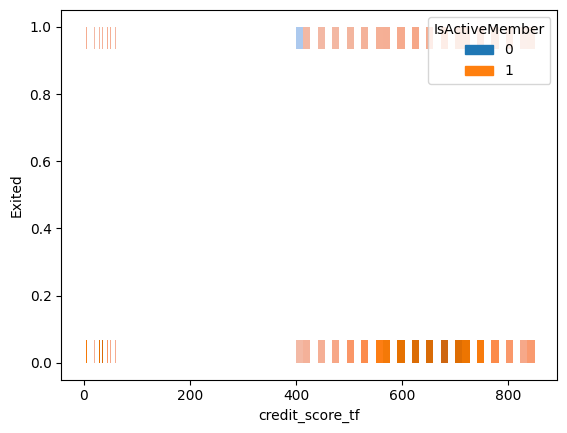

In [57]:
for i in c2:
  sns.histplot(data=df,x=df[i],y=df.Exited,hue=df.IsActiveMember)

array([[<Axes: title={'center': 'credit_score_tf'}>,
        <Axes: title={'center': 'age_tf'}>],
       [<Axes: title={'center': 'log10_balance'}>,
        <Axes: title={'center': 'log10_estimated_salary'}>]], dtype=object)

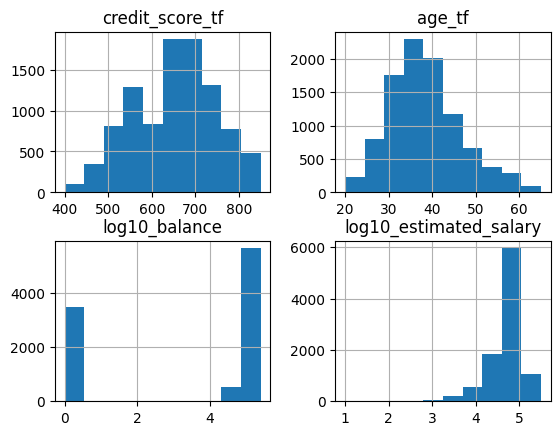

In [62]:
df[c2].hist()